In [1]:
"""
estimate_period(time, rv, min_p, max_p, num_points)

Estimate the orbital period from the Agol method.
"""
function estimate_period(time, rv, min_p, max_p, num_points)
  period = 0
  prev = Inf
    for p in linspace(min_p, max_p, num_points)
    sum = 0
    data_temp = zeros(Float64, length(time), 2)
    data_temp[:,1] = mod(time,p)
    data_temp[:,2] = rv
    sorted = sortrows(data_temp, by=x->x[1])

    for i=2:length(time)
        sum += (sorted[i,2] - sorted[i-1,2])^2
    end

    if sum < prev
      prev = sum
      period = p
    end
  end
  return period
end

estimate_period (generic function with 1 method)

In [2]:
data =  readdlm("./mystery_planet.txt");
time = data[:,1];
rv = data[:,2];
err = data[:,3];

In [3]:
estimate_period(time, rv, 100, 150, 10000)

116.68166816681668

In [4]:
using PyPlot

## Test our period guessing scheme:

In [7]:
period = 0
prev = Inf
sumslist = []
for p in linspace(0, 300, 10000)
    sums = 0
    data_temp = zeros(Float64, length(time), 2)
    data_temp[:,1] = mod(time,p)
    data_temp[:,2] = rv
    sorted = sortrows(data_temp, by=x->x[1])

    for i=2:length(time)
        sums += (sorted[i,2] - sorted[i-1,2])^2
    end
    push!(sumslist, sums)
    
    if sums < prev
        prev = sums
        period = p
    end
end
println(period)

116.68166816681668


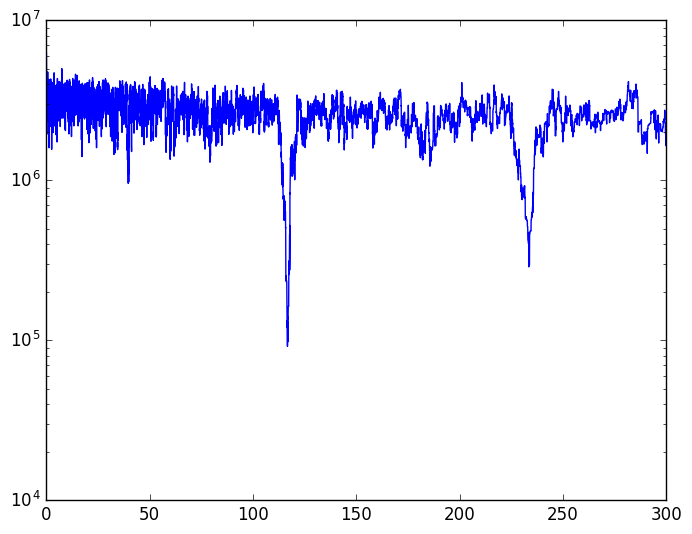

In [8]:
plot(linspace(0, 300, 10000), sumslist)
yscale("log")